# Computer Vision

### [Resource](https://www.learnpytorch.io/03_pytorch_computer_vision/)

Computer vision is the art of teaching a computer to see.

For example:
- Building a model to classify whether a photo is of a cat or a dog (Binary Classification).
- Whether a photo is of a cat, dog or chicken (Multi-class Classification).
- Identifying where a car appears in a video frame ([Object Detection](https://en.wikipedia.org/wiki/Object_detection)).
- Figuring out where different objects in an image can be separated ([Panoptic Segmentation](https://arxiv.org/abs/1801.00868)).

<img src = 'https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-computer-vision-problems.png'>

## Where does computer vision get used?

- If you use a smartphone, you've already used computer vision.
- Camera and photo apps use computer vision to enhance and sort images.
- Modern cars use computer vision to avoid other cars and stay within lane lines.
- Manufacturers use computer vision to identify defects in various products.
- Security cameras use computer vision to detect potential intruders.



## Content to Cover in Computer Vision
<img src = 'https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-pytorch-computer-vision-workflow.png'>

| Topic | Contents |
|-------|----------|
| 0. Computer Vision Libraries in PyTorch | PyTorch has useful built-in computer vision libraries. |
| 1. Load Data | Start with images of clothing from [FashionMNIST](https://github.com/zalandoresearch/fashion-mnist). |
| 2. Prepare Data | Load images with [PyTorch DataLoader](https://pytorch.org/docs/stable/data.html) for training. |
| 3. Model 0: Baseline Model | Create a multi-class classification model with a chosen loss function and optimizer. |
| 4. Predictions and Evaluation | Test baseline model predictions and assess performance. |
| 5. Device Agnostic Code | Write flexible, device-agnostic code. |
| 6. Model 1: Adding Non-linearity | Improve baseline model with non-linear layers. |
| 7. Model 2: CNN | Introduce [Convolutional Neural Network (CNN)](https://www.happiestminds.com/insights/convolutional-neural-networks-cnns/#:~:text=Within%20Deep%20Learning%2C%20a%20Convolutional,image%20by%20using%20a%20CNN.) architecture. |
| 8. Compare Models | Compare the three models built. |
| 9. Evaluate Best Model | Assess performance on random images using the best model. |
| 10. Confusion Matrix | Create and interpret a confusion matrix for model evaluation. |
| 11. Save/Load Best Model | Save and load the best-performing model for future use. |

## 0. Computer Vision Libraries in PyTorch
| PyTorch Module                | What it Does                                                                        |
|-------------------------------|-------------------------------------------------------------------------------------|
| [`torchvision`](https://pytorch.org/vision/stable/index.html)                 | Contains datasets, model architectures, and image transformations for computer vision. |
| [`torchvision.datasets`](https://pytorch.org/vision/stable/datasets.html)        | Provides example computer vision datasets and base classes for custom datasets.        |
| [`torchvision.models`](https://pytorch.org/vision/stable/models.html)     | Contains well-performing and commonly used computer vision model architectures.       |
| [`torchvision.transforms`](https://pytorch.org/vision/stable/transforms.html)     | Offers common image transformations needed before using images with a model.          |
| [`torch.utils.data.Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset)   | Base dataset class in PyTorch for creating custom datasets.                           |
| [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html#module-torch.utils.data)  | Creates a Python iterable over a dataset, facilitating easy iteration during training. |



In [1]:
# Import torch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor

import numpy as np
import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.1.0+cu121
0.16.0+cu121


## 1. Load Data
Loading up data of [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html) (Modified National Institute of Standards and Technology) Datasets which contains grayscale images of 10 different kinds of clothing.

<img src = "https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-fashion-mnist-slide.png">

Also there are other datasets available in [`torchvision.datasets`](https://pytorch.org/vision/stable/datasets.html)

*The [original MNIST](https://en.wikipedia.org/wiki/MNIST_database) dataset contains thousands of examples of handwritten digits (from 0 to 9) and was used to build computer vision models to identify numbers for postal services.*


In [2]:
# Setting up training data (Look up documentation of torchvision.datasets.FashionMNIST)
train_data = datasets.FashionMNIST(root = "data",   # Storage location of dataset
                                   train = True,    # Indication of downloading train_datasets
                                   download = True,   # Flag to set for downloading datasets
                                   transform = torchvision.transforms.ToTensor(),   # Transform image datasets to tensors
                                   target_transform = None)   # Flag to set for transformation of labels/targets

# Setting up tests data
test_data = datasets.FashionMNIST(root = "data",
                                  train = False,   # Indication of downloading test_datasets
                                  download = True,
                                  transform = torchvision.transforms.ToTensor(),
                                  target_transform = None)

100%|██████████| 26421880/26421880 [00:01<00:00, 16808950.98it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 306890.91it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5479901.01it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 20255419.32it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
len(train_data), len(test_data)

(60000, 10000)

### [Documentation for torchvision.transforms.ToTensor()](https://pytorch.org/vision/stable/generated/torchvision.transforms.ToTensor.html)

It converts a PIL Image or ndarray to tensor and scale the values accordingly.

In [4]:
# See first training data and labels
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
# Class names/labels of train_datasets from FashionMNIST
class_name = train_data.classes
class_name, len(class_name)

(['T-shirt/top',
  'Trouser',
  'Pullover',
  'Dress',
  'Coat',
  'Sandal',
  'Shirt',
  'Sneaker',
  'Bag',
  'Ankle boot'],
 10)

In [6]:
# Mapping classes to dictionary indices
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

### 1.1 Checking imput and output shapes

In [7]:
print(f'Image Shape: {image.shape}, label class_name and output shape: {class_name[label], label}')

Image Shape: torch.Size([1, 28, 28]), label class_name and output shape: ('Ankle boot', 9)


The shape of the image tensor is [1, 28, 28] or more specifically:

```python
[color_channels=1, height=28, width=28]
```

Having `color_channels = 1` means the image is grayscale. If `color_channels = 3`,  means the image is RGB.

<img src ="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-computer-vision-input-and-output-shapes.png">

### 1.2 Visualizing data using `matplotlib.pyplot`

Image Shape: torch.Size([1, 28, 28])


TypeError: Invalid shape (1, 28, 28) for image data

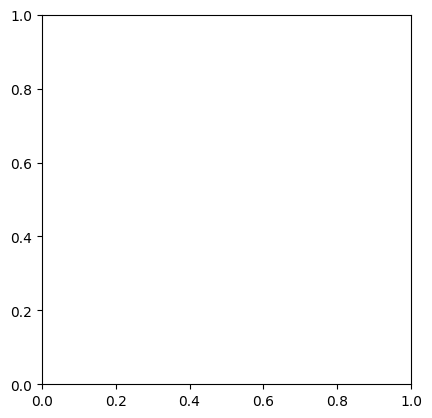

In [8]:
image, label = train_data[0]
print(f'Image Shape: {image.shape}')
plt.imshow(image)

Above Error happened because `matplotlib.pylot` expects the image tensor array values to be
- either in `[height, width, color_channels]` format
  ```python
  [height=28, width=28, color_channels=1]
  ```
- or in `[height, width]` format, `no color_channels` at all

Image Shape: torch.Size([1, 28, 28])
After Squeeze, Image Shape: torch.Size([28, 28])


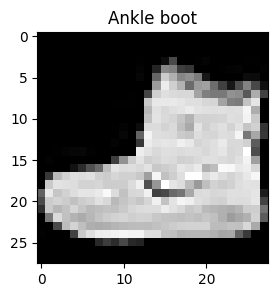

In [9]:
image, label = train_data[0]
print(f'Image Shape: {image.shape}')
print(f'After Squeeze, Image Shape: {image.squeeze().shape}')
plt.figure(figsize = (3, 3))
plt.imshow(image.squeeze(), cmap = "gray")    # cmap="gray" to generate image on grayscale
plt.title(class_name[label]);

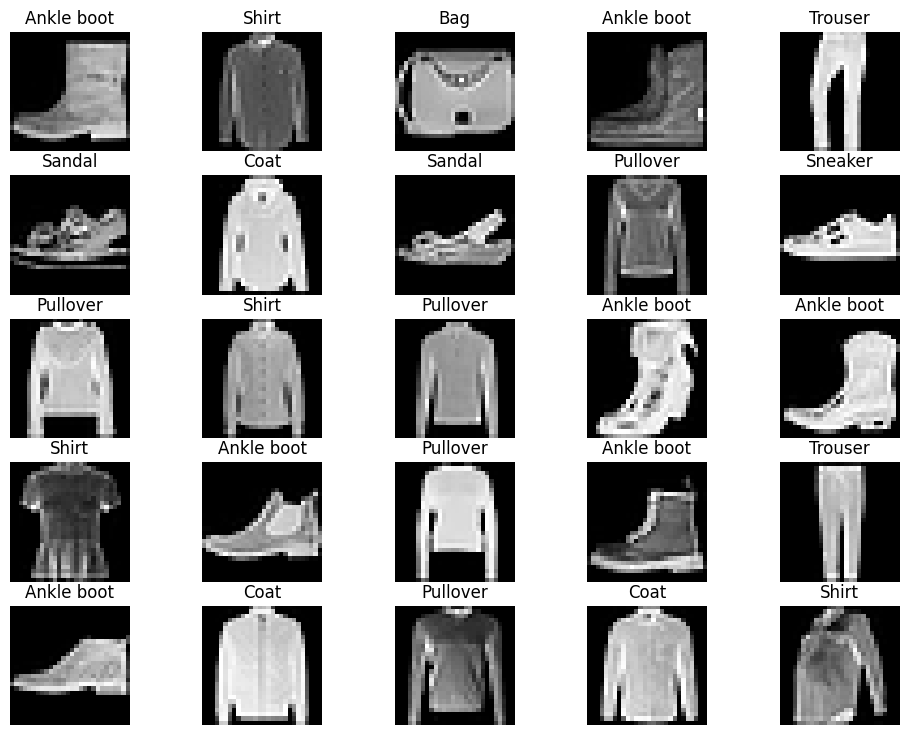

In [10]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize = (12, 9))
rows, cols = 5, 5

for i in range(1, rows*cols + 1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  # print(random_idx)
  image, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(image.squeeze(), cmap = "gray")    # cmap="gray" to generate image on grayscale
  plt.title(class_name[label])
  plt.axis(False);

## 2. Prepare Data
The next step in your PyTorch workflow is to prepare your dataset with [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset), or `DataLoader` for short.

`DataLoader` facilitates loading data into a model for both training and inference. It transforms a large dataset into a Python iterable of smaller chunks, known as batches or mini-batches, with the `batch_size` parameter. This is because, the computational hardware may not be able to store thousands of images in one hit.

### What's a good batch size?

A common starting point for the batch size is 32, which proves effective for a variety of machine learning problems. But since this is a value you can set (a **hyperparameter**) you can try all different kinds of values, though generally powers of 2 are used most often (e.g. 32, 64, 128, 256, 512).

<img src = "https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-batching-fashionmnist.png">

### [Lecture about Mini Batches](https://www.youtube.com/watch?v=4qJaSmvhxi8)

In [11]:
# Import Dataloader
from torch.utils.data import DataLoader

# Setup batch_size
BATCH_SIZE = 32

# Turn datasets into batches
train_dataloader = DataLoader(dataset = train_data,
                              batch_size = BATCH_SIZE,
                              shuffle = True)

test_dataloader = DataLoader(dataset = test_data,
                              batch_size = BATCH_SIZE,
                              shuffle = False)

print(f'Dataloaders: {train_dataloader, test_dataloader}')
print(f'Length of Train Dataloaders:: {len(train_dataloader)} with batches {BATCH_SIZE}')
print(f'Length of Test Dataloaders: {len(test_dataloader)} with batches {BATCH_SIZE}')

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7d7751ab3ac0>, <torch.utils.data.dataloader.DataLoader object at 0x7d7751ab3f40>)
Length of Train Dataloaders:: 1875 with batches 32
Length of Test Dataloaders: 313 with batches 32


In [12]:
# Checking what's inside training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))

train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

## 3. Model 0: Baseline Model

When starting to build a series of machine learning modelling experiment, it's best practice to start with a **baseline model** . A baseline model is a simple model you will try and improve upon with subsequent models/experiments.

So to build a simple baseline model we wil be using PyTorch's `nn.Module`. This initial model will consist of two [`nn.Linear()`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) layers. However, since we're dealing with image data, we'll start with the [`nn.Flatten()`](https://pytorch.org/docs/stable/generated/torch.nn.Flatten.html) layer to **compress tensor dimensions** into a **single vector**.

In [13]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x)   # Perform forward pass

# Print
print(f'Before flatten: {x.shape}')      # [color_channels, height, width]
print(f'After flatten: {output.shape}')  # [color_channels, height*width]

Before flatten: torch.Size([1, 28, 28])
After flatten: torch.Size([1, 784])


In [14]:
output.squeeze()

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0196, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0157, 0.0000, 0.0157, 0.0039, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0039, 0.0000, 0.1490, 0.4667, 0.5098, 0.5373, 0.4941, 0.4824, 0.5137,
        0.5490, 0.5137, 0.1294, 0.0000, 0.0039, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0118, 0.0039,
        0.0157, 0.0000, 0.2353, 0.5255, 0.1765, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0235, 0.1686, 0.4745, 0.3647, 0.0000, 0.0314, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 

In [15]:
# Building model class
class FashionMNISTModelV0(nn.Module):
  def __init__(self, input_shape, hidden_units, output_shape):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(input_shape, hidden_units),  # nn.Linear(in_features, out_features)
        nn.Linear(hidden_units, output_shape)
        )

  def forward(self, x):
    return self.layer_stack(x)

In [16]:
torch.manual_seed(42)

model_0 = FashionMNISTModelV0(
    input_shape = 784,  # 28*28
    hidden_units = 16,  # hidden neural networks
    output_shape = len(class_name)  # which is 10 labels
    ).to('cpu')

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=16, bias=True)
    (2): Linear(in_features=16, out_features=10, bias=True)
  )
)

In [17]:
# Checking a sample through forward pass on FashionMNISTModelV0
dummy_x = torch.rand([1, 1, 28, 28])

model_0(dummy_x)

tensor([[ 0.0599, -0.0578, -0.1531, -0.3557, -0.1761,  0.0471,  0.2426, -0.5298,
         -0.0458, -0.0342]], grad_fn=<AddmmBackward0>)

### 3.1 Setting up loss_fn, optimizer and evaluation metrics

- **loss_fn** : since, we're working with multi-class data, our loss function will be `nn.CrossEntropyLoss()`
- **optimizier** : using `nn.torch.optim.SGD()`
- **evaluation metric** : since, we're working on a classification problem, lets use accuracy as evaluation metric




In [18]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.01)

In [19]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.2/840.2 kB 7.8 MB/s eta 0:00:00


In [20]:
from torchmetrics import Accuracy

torchmetrics_accuracy = Accuracy(task = 'multiclass',
                                 num_classes = len(class_name)).to('cpu')

### 3.2 Creating a function to time our experiments

Two main things to often track are:
- Model's performance (loss and accuracy values)
- How fast it runs  

In [21]:
from timeit import default_timer as timer

def train_time(start: float,
               end: float,
               device: torch.device = None):
  """Prints difference between start and end time"""
  total_time = end - start
  print(f'Trained on {device}: {total_time:.3f} seconds')
  return total_time

In [22]:
start_time = timer()
# some code ...
end_time = timer()

train_time(start = start_time, end = end_time, device = 'cpu')

Trained on cpu: 0.000 seconds


6.24560000233032e-05

### 3.3 Creating a training loop and training model on batches of data

- Loop through epochs
- Loop through training batches, perform training steps, calculate train loss/batch
- Loop through testing batches, perform testing steps, calculate test loss/batch
- Print out progress
- Time it all


In [23]:
# Progress bar
from tqdm.auto import tqdm

# Set seed and start the timer
torch.manual_seed(42)
train_time_start_cpu = timer()

# Set the no of epochs
epochs = 3

# Create training and tests loop
for epoch in tqdm(range(epochs)):
  print(f'Epoch: {epoch}\n--------------')
  # Training
  train_loss = 0
  # Add a loop to loop through the training batches
  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()
    # 1) Forward pass
    y_pred = model_0(X)

    # 2) Calculate the loss
    loss = loss_fn(y_pred, y)
    train_loss += loss    # Accumulate train loss

    # 3) Optimizer zero grad
    optimizer.zero_grad()

    # 4) Loss Backward
    loss.backward()

    # 5) Optimizer step
    optimizer.step()

    # Print out
    if batch % 400 == 0:
      print(f'Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples')

  # Divide total train loss by length of train_dataloader
  train_loss /= len(train_dataloader)

  # Testing
  test_loss, test_acc = 0, 0

  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      # 1) Forward pass
      test_pred = model_0(X_test)

      # 2) Calculate the loss
      test_loss += loss_fn(test_pred, y_test)

      # 3) Calculate the accuracy
      test_acc += torchmetrics_accuracy(y_test, test_pred.argmax(dim = 1)) * 100  #logits -> pred labels

    # Calculate the test loss avg per batch
    test_loss /= len(test_dataloader)

    # Calculate the test acc avg. per batch
    test_acc /= len(test_dataloader)

  # Print out
  print(f'\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f} --- Test acc: {test_acc:.2f}%')

# Calculate training time
train_time_end_cpu = timer()
total_train_time_model_0 = train_time(train_time_start_cpu,
                                      train_time_end_cpu,
                                      device = str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
--------------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.8765 | Test loss: 0.6257 --- Test acc: 78.60%
Epoch: 1
--------------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.5588 | Test loss: 0.5405 --- Test acc: 81.08%
Epoch: 2
--------------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.5011 | Test loss: 0.5078 --- Test acc: 82.13%
Trained on cpu: 40.353 seconds


## 4. Predictions and Evaluation

In [24]:
torch.manual_seed(42)

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               torchmetrics_accuracy):
  """Returns a dictionary containing the results of model predicting on data_loader"""
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      # Make predictions
      y_pred = model(X)

      # Accumulate loos and acc_values per batch
      loss += loss_fn(y_pred, y)
      acc += torchmetrics_accuracy(y, y_pred.argmax(dim = 1)) * 100

    # Scale loss and acc to finid the avg loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return{"model_name": model.__class__.__name__,   # only works when model was created with class
         "model_loss": loss.item(),
         "model_acc": acc.item()
         }

# Calculate model_0 results in test_dataset
model_0_results = eval_model(model_0,
                             test_dataloader,
                             loss_fn,
                             torchmetrics_accuracy)

model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.5078018307685852,
 'model_acc': 82.12859344482422}

## 5. Device Agnostic Code

In [25]:
!nvidia-smi

Sun Jan 28 13:23:54 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P8              10W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [26]:
# Setting up device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


## 6. Model 1: Adding Non-linearity

 Recreating a similar model as before, except this time we'll put non-linear functions (`nn.ReLU()`) in between each linear layer.

 We learned about the power of non-linearity in [PyTorch_Neural_Network_Classification](https://github.com/LuluW8071/Data-Science/blob/main/Pytorch/02_PyTorch_Neural_Network_Classification/00_PyTorch_Neural_Network_Classification.ipynb)

In [27]:
class FashionMNISTModelV1(nn.Module):
  def __init__(self, input_shape, hidden_units, output_shape):
    super().__init__()
    self.linear_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(input_shape, hidden_units),
        nn.ReLU(),
        nn.Linear(hidden_units, output_shape),
        nn.ReLU()
    )

  def forward(self, x):
    return self.linear_stack(x)

In [28]:
torch.manual_seed(42)

model_1 = FashionMNISTModelV1(
    input_shape = 28*28,
    hidden_units = 16,
    output_shape = len(class_name)
    ).to(device)

model_1

FashionMNISTModelV1(
  (linear_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=16, bias=True)
    (2): ReLU()
    (3): Linear(in_features=16, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [29]:
next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.1 Setting up loss_fn, optimizer and evaluation metrics




In [30]:
from torchmetrics import Accuracy

torchmetrics_accuracy = Accuracy(task = 'multiclass',
                                 num_classes = len(class_name)).to(device)

In [31]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

### 6.2 Functionizing training and test loops

Creating a function for
- Training loop : `train_step()`
- Testing loop : `test_loop()`

In [32]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               torchmetrics_accuracy,
               device: torch.device = device):
  """ Performs a training with model trying to learn on data_loader"""

  train_loss, train_acc = 0, 0
  model.to(device)
  # Add a loop to loop through the training batches
  for batch, (X, y) in enumerate(data_loader):
    # Pass data to cuda
    X, y = X.to(device), y.to(device)

    # 1) Forward pass
    y_pred = model(X)

    # 2) Calculate the loss and accuracy
    loss = loss_fn(y_pred, y)
    train_loss += loss    # Accumulate train loss
    train_acc += torchmetrics_accuracy(y,
                                       y_pred.argmax(dim = 1)) * 100   # logits -> pred labels

    # 3) Optimizer zero grad
    optimizer.zero_grad()

    # 4) Loss Backward
    loss.backward()

    # 5) Optimizer step
    optimizer.step()

  # Divide total train loss by length of train_dataloader
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss:.4f} --- Train acc: {train_acc:.2f}%")


def test_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               torchmetrics_accuracy,
               device: torch.device = device):
  """ Performs a testing on model going over data_loader"""

  test_loss, test_acc = 0, 0
  model.to(device)
  model.eval()

  with torch.inference_mode():
    for X_test, y_test in data_loader:
      # Pass test_data to cuda
      X_test, y_test = X_test.to(device), y_test.to(device)

      # 1) Forward pass
      test_pred = model(X_test)

      # 2) Calculate the loss and accuracy
      test_loss += loss_fn(test_pred, y_test)
      test_acc += torchmetrics_accuracy(y_test,
                                        test_pred.argmax(dim = 1)) * 100  # logits -> pred labels

    # Calculate the test loss and test acc avg per batch
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f'Test loss: {test_loss:.4f} --- Test acc: {test_acc:.2f}%')

In [33]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_gpu = timer()

# Train/test loop
epochs = 3

for epoch in tqdm(range(epochs)):
  print(f'Epoch: {epoch}')
  train_step(model_1,
             train_dataloader,
             loss_fn, optimizer,
             torchmetrics_accuracy,
             device)
  test_step(model_1,
             test_dataloader,
             loss_fn, optimizer,
             torchmetrics_accuracy,
             device)

train_time_end_gpu = timer()
total_train_time_model_1 = train_time(train_time_start_gpu,
                                            train_time_end_gpu,
                                            device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
Train loss: 1.4366 --- Train acc: 57.80%
Test loss: 1.1258 --- Test acc: 65.06%
Epoch: 1
Train loss: 1.0364 --- Train acc: 67.30%
Test loss: 0.9979 --- Test acc: 67.70%
Epoch: 2
Train loss: 0.9510 --- Train acc: 68.86%
Test loss: 0.9465 --- Test acc: 68.38%
Trained on cuda: 50.509 seconds


### 6.3 Making prediction and evaluation

In [34]:
torch.manual_seed(42)

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               torchmetrics_accuracy,
               device = device):
  """Returns a dictionary containing the results of model predicting on data_loader"""
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      # Make our data devide agnostic
      X, y = X.to(device), y.to(device)
      # Make predictions
      y_pred = model(X)

      # Accumulate loos and acc_values per batch
      loss += loss_fn(y_pred, y)
      acc += torchmetrics_accuracy(y, y_pred.argmax(dim = 1)) * 100

    # Scale loss and acc to finid the avg loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return{"model_name": model.__class__.__name__,   # only works when model was created with class
         "model_loss": loss.item(),
         "model_acc": acc.item()
         }

# Calculate model_0 results in test_dataset
model_1_results = eval_model(model_1,
                             test_dataloader,
                             loss_fn,
                             torchmetrics_accuracy)

model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.9465436935424805,
 'model_acc': 68.3805923461914}

In [35]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.5078018307685852,
 'model_acc': 82.12859344482422}

The model `FashionMNISTModelV1` performed worse than `FashionMNISTModelV0` even though we introduced non-linearity functions and trained on GPU. That's a thing to note in machine learning, sometimes the thing you thought should work doesn't. And then the thing you thought might not work does.

From the looks of things, it seems like our model is** overfitting** on the training data. **Overfitting** means our model is learning the training data well but those patterns aren't generalizing to the testing data.

Two of the main to fix overfitting include:

- Using a smaller or different model (some models fit certain kinds of data better than others).
- Using a larger dataset (the more data, the more chance a model has to learn generalizable patterns).



*Note: Sometimes, depending upon your data/hardware you might find that your model trains faster on CPU than GPU*

### Why is this?
- It could be that the overhead for copying data/model to and from the GPU outweighs the compute benefits offered by the GPU.
- The hardware you're using has a better CPU in terms of compute capability than the GPU.

### [Making Deep Learning Model Run Faster on GPU](https://horace.io/brrr_intro.html)


### 7. Model 2: [CNN (Covolutional Neural Network)](https://en.wikipedia.org/wiki/Convolutional_neural_network)

CNN's are also known as ConvNet. CNN's are known for their capabilities to find patterns in visual data.

<img src = "https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-conv-net-as-compression.png">

The CNN model we're going to be using is known as **TinyVGG**.

It follows the typical structure of a convolutional neural network:

```
Input layer -> [Convolutional layer -> activation layer -> pooling layer] -> Output layer
```

### [Check out on How CNN works with Visualization](https://poloclub.github.io/cnn-explainer)



In [36]:
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
  """Model architecture that replicates the TinyVGG model from CNN explainer website"""
  def __init__(self, input_shape, hidden_units, output_shape):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels = hidden_units,
                  kernel_size = 3,    # selects '3x3' pixels at a time
                  stride = 1,     # skips '1' pixel at a time during selection of another 3x3 pixels
                  padding = 1,    # adds '1' pixel to edges of image
                  ),
                  # Values we can set ourselves in our NN's are called hyperparameters
                  # Click on above link [Check out on How CNN works with Visualization] to know about these parameters
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        # Applying nn.MaxPool2d due to nn.conv2d
        nn.MaxPool2d(kernel_size = 2)   # Lets say it takes max_val of tensor input_size(2x2)[4 tensors] & outputs a single max_val
        )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2)
        )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units *7*7,
                  out_features = output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    # print(x.shape)
    x = self.conv_block_2(x)
    # print(x.shape)
    x = self.classifier(x)
    return x

In [37]:
torch.manual_seed(42)

model_2 = FashionMNISTModelV2(input_shape = 1,
                              hidden_units = 10,
                              output_shape = len(class_name)).to(device)

model_2

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

### 7.1 Stepping through [`nn.Conv2d()`](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html)

- `in_channels (int)` - Number of channels in the input image.
- `out_channels (int)` - Number of channels produced by the convolution.
- `kernel_size (int or tuple)` - Size of the convolving kernel/filter.
- `stride (int or tuple, optional) `- How big of a step the convolving kernel takes at a time. Default: 1.
- `padding (int, tuple, str)` - Padding added to all four sides of input. Default: 0.

In [38]:
torch.manual_seed(42)

# Create a dummy batch of images
images = torch.randn(32, 3, 64, 64)
test_image = images[0]

print(f'Image batch shape: {images.shape}')
print(f'Single image shape: {test_image.shape}')
print(f'Test image:\n{test_image}')

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image:
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.

In [39]:
test_image.shape

torch.Size([3, 64, 64])

In [40]:
torch.manual_seed(42)

# Create a single nn.Conv2d layer
conv_layer = nn.Conv2d(in_channels = 3,
                       out_channels = len(class_name),
                       kernel_size = 3,   # selects '3x3' pixels at a time
                       stride = 1,    # skips '1' pixel at a time during selection of another 3x3 pixels
                       padding = 0)   # adds '0' pixel to edges of image

# Pass the data through the convolutional layer
conv_output = conv_layer(test_image)
conv_output, conv_output.shape

(tensor([[[ 1.5396,  0.0516,  0.6454,  ..., -0.3673,  0.8711,  0.4256],
          [ 0.3662,  1.0114, -0.5997,  ...,  0.8983,  0.2809, -0.2741],
          [ 1.2664, -1.4054,  0.3727,  ..., -0.3409,  1.2191, -0.0463],
          ...,
          [-0.1541,  0.5132, -0.3624,  ..., -0.2360, -0.4609, -0.0035],
          [ 0.2981, -0.2432,  1.5012,  ..., -0.6289, -0.7283, -0.5767],
          [-0.0386, -0.0781, -0.0388,  ...,  0.2842,  0.4228, -0.1802]],
 
         [[-0.2840, -0.0319, -0.4455,  ..., -0.7956,  1.5599, -1.2449],
          [ 0.2753, -0.1262, -0.6541,  ..., -0.2211,  0.1999, -0.8856],
          [-0.5404, -1.5489,  0.0249,  ..., -0.5932, -1.0913, -0.3849],
          ...,
          [ 0.3870, -0.4064, -0.8236,  ...,  0.1734, -0.4330, -0.4951],
          [-0.1984, -0.6386,  1.0263,  ..., -0.9401, -0.0585, -0.7833],
          [-0.6306, -0.2052, -0.3694,  ..., -1.3248,  0.2456, -0.7134]],
 
         [[ 0.4414,  0.5100,  0.4846,  ..., -0.8484,  0.2638,  1.1258],
          [ 0.8117,  0.3191,

### 7.2 Stepping through [`nn.MaxPool2d()`](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html)

In [41]:
# Print out original image shape without unsqueezed dimension
print(f'Test image original shape: {test_image.shape}')
print(f'Test image unsqueezed shape: {test_image.unsqueeze(0).shape}')

# Create a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size = 2)

# Pass data through just the conv2d layer
test_image_through_conv = conv_layer(test_image.unsqueeze(0))
print(f'Shape after passing through conv_layer(): {test_image_through_conv.shape}')

# Pass data through just the MaxPool2d layer
test_iamge_through_conv_and_maxpool = max_pool_layer(test_image_through_conv)
print(f'Shape after passing through conv_layer() and maxpool_layer: {test_iamge_through_conv_and_maxpool.shape}')

Test image original shape: torch.Size([3, 64, 64])
Test image unsqueezed shape: torch.Size([1, 3, 64, 64])
Shape after passing through conv_layer(): torch.Size([1, 10, 62, 62])
Shape after passing through conv_layer() and maxpool_layer: torch.Size([1, 10, 31, 31])


<img src = "https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-conv2d-layer.gif">

If you didn't understand **7.2** section demonstration. Then, lets see for smaller image through creation of random tensor having
- *width = 2px*
- *height = 2px*

In [42]:
torch.manual_seed(42)

# Create a random tensor
random_tensor = torch.randn(1, 1, 2, 2)
print(f'Random tensor:\n{random_tensor}')

max_pool_layer = nn.MaxPool2d(kernel_size = 2)  # Selects '2x2' pixels at a time
max_pool_tensor = max_pool_layer(random_tensor)   # Outputs a single max_val from selected '2x2' pixels

print(f'Max pool tensor: {max_pool_tensor}')
print(f'Max pool tensor shape: {max_pool_tensor.shape}')

Random tensor:
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Max pool tensor: tensor([[[[0.3367]]]])
Max pool tensor shape: torch.Size([1, 1, 1, 1])


### 7.3 Setting up loss_fn and optimizer

In [43]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_2.parameters(), lr = 0.01)

### 7.4 Training and Testing `model_2` using `train_step()` and `test_step()` functions

In [44]:
torch.manual_seed(42)

from timeit import default_timer as timer
train_time_start = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f'Epoch: {epoch}\n----')
  train_step(model_2,
             train_dataloader,
             loss_fn, optimizer,
             torchmetrics_accuracy,
             device)
  test_step(model_2,
            test_dataloader,
            loss_fn, optimizer,
            torchmetrics_accuracy,
            device)

train_time_end = timer()
total_train_time_model_2 = train_time(train_time_start,
                                      train_time_end,
                                      device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----
Train loss: 1.0378 --- Train acc: 62.34%
Test loss: 0.6251 --- Test acc: 76.90%
Epoch: 1
----
Train loss: 0.5493 --- Train acc: 80.02%
Test loss: 0.4983 --- Test acc: 81.53%
Epoch: 2
----
Train loss: 0.4557 --- Train acc: 83.52%
Test loss: 0.4399 --- Test acc: 84.19%
Trained on cuda: 49.843 seconds


In [45]:
# Evaluating model_2 results
model_2_results = eval_model(model_2,
                             test_dataloader,
                             loss_fn,
                             torchmetrics_accuracy)
model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.4399385154247284,
 'model_acc': 84.185302734375}

## 8. Compare Models

In [46]:
import pandas as pd

compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.507802,82.128593
1,FashionMNISTModelV1,0.946544,68.380592
2,FashionMNISTModelV2,0.439939,84.185303


In [47]:
# Adding training time to results comparision
compare_results["train_time"] = [total_train_time_model_0,
                                 total_train_time_model_1,
                                 total_train_time_model_2]

compare_results

,model_name,model_loss,model_acc,train_time
0,FashionMNISTModelV0,0.507802,82.128593,40.352889
1,FashionMNISTModelV1,0.946544,68.380592,50.509430
2,FashionMNISTModelV2,0.439939,84.185303,49.843192


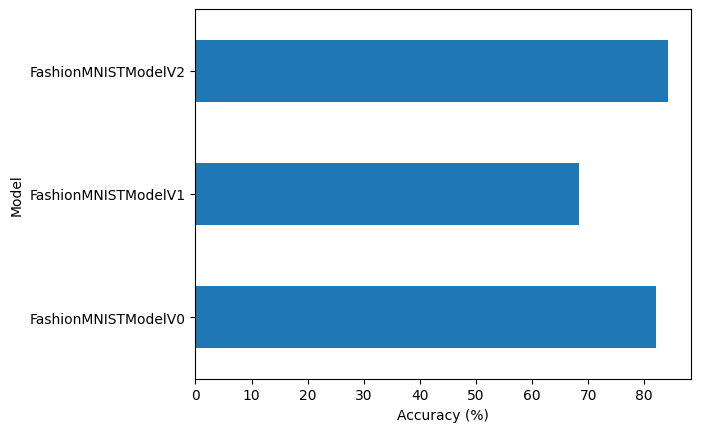

In [48]:
# Visualizing model results
compare_results.set_index('model_name')['model_acc'].plot(kind = 'barh')
plt.xlabel('Accuracy (%)')
plt.ylabel('Model');

## 9. Evaluate and Predict with Best Model

In [49]:
def make_predictions(model, data, device = device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare sample (Add batch_dimension and pass to target device)
      sample = torch.unsqueeze(sample, dim = 0).to(device)

      # Forward pass
      pred_logit = model(sample)

      # Get prediction probability (logit -> prediction probability)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim = 0)

      # Get pred_prob off the GPU for further calculation
      pred_probs.append(pred_prob.cpu())

  # Stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)

In [50]:
import random
# random.seed(42)

test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k = 12):
  test_samples.append(sample)
  test_labels.append(label)

# View first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

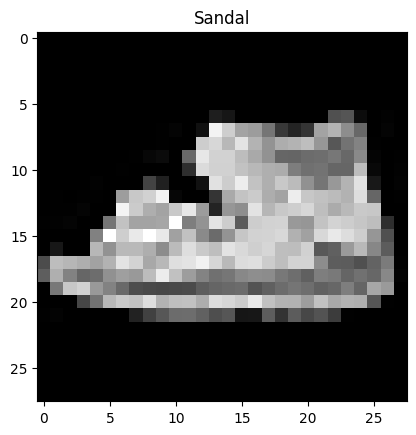

In [51]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_name[test_labels[0]]);

In [52]:
# Make Predictions
pred_probs = make_predictions(model_2,
                              test_samples)

# View first 5 prediciton probabilities
pred_probs[:5]

tensor([[8.8041e-05, 7.2984e-05, 1.1784e-04, 2.3762e-05, 2.5682e-04, 9.7732e-01,
         4.6922e-05, 1.2465e-02, 8.6933e-03, 9.1070e-04],
        [8.4116e-07, 4.8222e-07, 3.5283e-07, 2.8958e-06, 1.0800e-07, 2.7278e-02,
         2.5504e-07, 1.2682e-01, 6.6091e-04, 8.4523e-01],
        [9.3506e-06, 2.8006e-06, 4.3585e-06, 8.7711e-06, 2.6583e-06, 4.6634e-03,
         1.0153e-05, 8.5943e-01, 2.1235e-03, 1.3374e-01],
        [1.3630e-05, 9.9952e-01, 4.5023e-07, 4.6242e-04, 7.1667e-06, 8.7334e-08,
         9.5445e-08, 2.1753e-08, 2.0105e-07, 1.7723e-09],
        [9.9028e-04, 9.8034e-01, 7.9297e-06, 1.8001e-02, 6.3252e-04, 1.8275e-07,
         2.1888e-05, 6.6824e-07, 7.1345e-06, 3.0758e-07]])

In [53]:
# Convert prediction proabbilities to labels
pred_classes = pred_probs.argmax(dim=1)
print(pred_classes, test_labels, sep = '\n')

tensor([5, 9, 7, 1, 1, 3, 4, 8, 5, 0, 6, 9])
[5, 9, 7, 1, 1, 3, 2, 8, 5, 6, 6, 9]


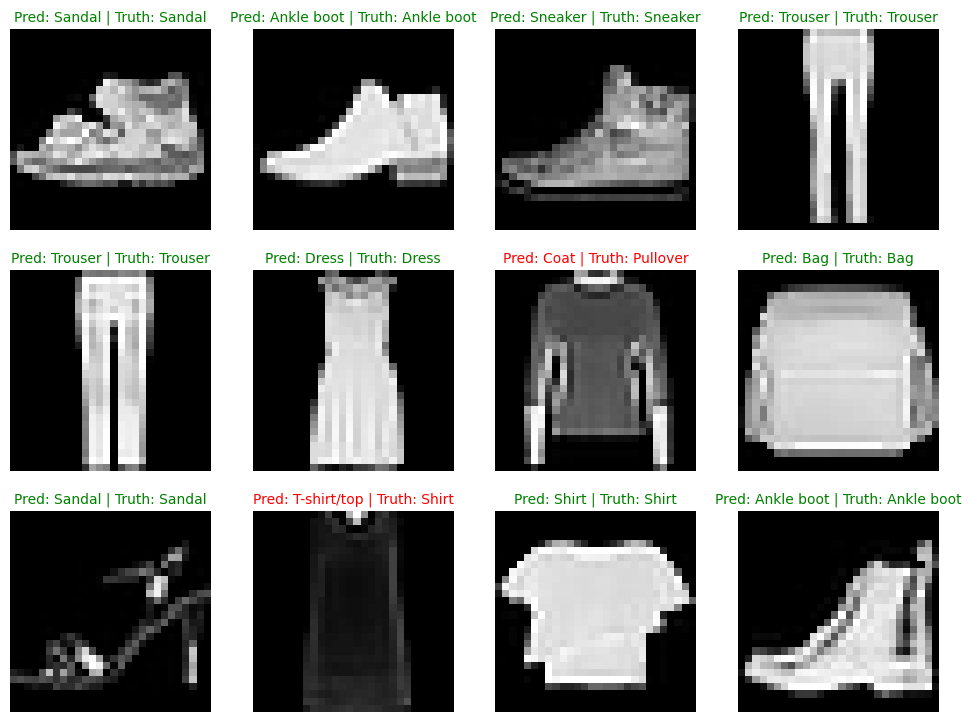

In [54]:
# Plot predictions
plt.figure(figsize = (12, 12))
nrows, ncols = 4, 4
for i, sample in enumerate(test_samples):
  plt.subplot(nrows, ncols, i+1)

  plt.imshow(sample.squeeze(), cmap = "gray")

  # Find prediction in text_form
  pred_label = class_name[pred_classes[i]]

  # Get the truth label in text form
  truth_label = class_name[test_labels[i]]

  # Create title for plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check equality between pred and truth and change color of title
  if pred_label == truth_label:
    plt.title(title_text, fontsize = 10, c="g")    # green if true predicition
  else:
    plt.title(title_text, fontsize = 10, c="r")    # red if false predicition

  plt.axis(False);

## 10. Confusion Matrix
There are many different [evaluation metrics](https://lightning.ai/docs/torchmetrics/stable/) we can use for classification problems.

A **confusion matrix** shows you where your classification model got confused between *predictions* and *true labels*.

To make a confusion matrix, we'll go through three steps:

- Make predictions with our `trained model`, `model_2` (a confusion matrix compares predictions to true labels).
- Make a confusion matrix using [`torchmetrics.ConfusionMatrix`](https://torchmetrics.readthedocs.io/en/latest/references/modules.html?highlight=confusion#confusionmatrix).
- Plot the confusion matrix using [`mlxtend.plotting.plot_confusion_matrix()`](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_confusion_matrix/).

In [55]:
from tqdm.auto import tqdm

# Make prediciton with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader,
                   desc = "Making predictions...\t"):
    # Pass data to target device agnostic
    X, y = X.to(device), y.to(device)

    # Foward pass
    y_logits = model_2(X)

    # Turn prediciton from logits -> prediciton probabilities -> prediciton labels
    y_pred = torch.softmax(y_logits.squeeze(), dim = 0).argmax(dim = 1 )

    # Place prediciton on CPU cause matplotlib doesn't take `y_pred` from GPU
    y_preds.append(y_pred.cpu())

# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10], len(y_pred_tensor)

Making predictions...	:   0%|          | 0/313 [00:00<?, ?it/s]

(tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7]), 10000)

In [56]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.22.0


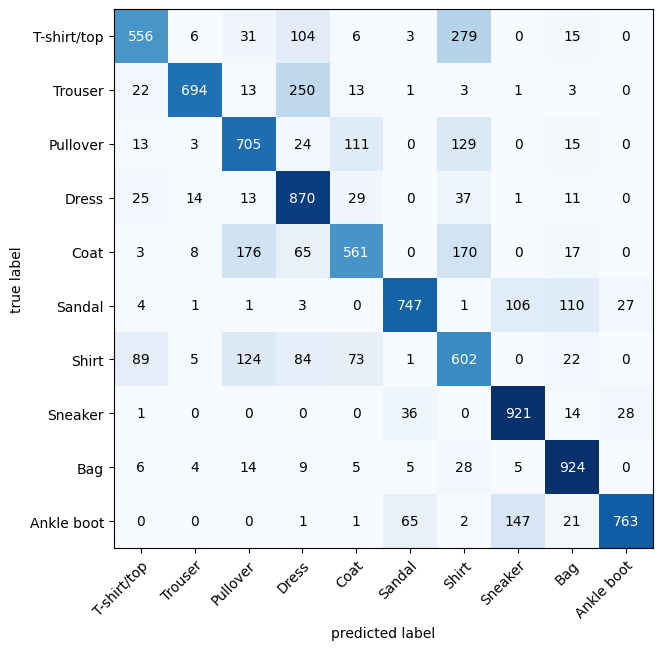

In [57]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes = len(class_name), task = 'multiclass')
confmat_tensor = confmat(preds = y_pred_tensor,
                         target = test_data.targets)

# Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(), # matplotlib likes working with NumPy
    class_names = class_name, # turn the row and column labels into class names
    figsize = (10, 7)
);

## 11. Save/Load Best Model
We already learned about saving and loading model in [Pytorch_Workflow](https://github.com/LuluW8071/Data-Science/blob/main/Pytorch/01_Pytorch_Workflow/00_Pytorch_Workflow.ipynb)

In [58]:
from pathlib import Path

# Create model directory
model_path = Path('models')
model_path.mkdir(parents=True, exist_ok=True)

# Create model save path
MODEL_NAME = "pytorch_computer_vision_model_2.pth"
model_save_path = model_path / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {model_save_path}")
torch.save(obj = model_2.state_dict(), # only saving the state_dict() only saves the learned parameters
           f = model_save_path)
print('Saved Successfully')

Saving model to: models/pytorch_computer_vision_model_2.pth
Saved Successfully


In [59]:
load_model = FashionMNISTModelV2(input_shape = 1,
                                 hidden_units = 10, # try changing this to 128 and seeing what happens
                                 output_shape = 10)

# Load model using saved state_dict
load_model.load_state_dict(torch.load(f = model_save_path))

# Send model to GPU
loaded_model_2 = load_model.to(device)

In [62]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(loaded_model_2,
                                    test_dataloader,
                                    loss_fn,
                                    torchmetrics_accuracy)

# Check the evaluated model results and model_2 results on GPU
loaded_model_2_results, model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

({'model_name': 'FashionMNISTModelV2',
  'model_loss': 0.4399385154247284,
  'model_acc': 84.185302734375},
 {'model_name': 'FashionMNISTModelV2',
  'model_loss': 0.4399385154247284,
  'model_acc': 84.185302734375})


We can find out if two tensors are close to each other using [`torch.isclose()`](https://pytorch.org/docs/stable/generated/torch.isclose.html) and passing in a tolerance level of closeness via the parameters *`atol`* (absolute tolerance) and *`rtol`* (relative tolerance).

If our model's results are close, the output of [`torch.isclose()`](https://pytorch.org/docs/stable/generated/torch.isclose.html) should be true.

In [61]:
# Check to see if results are close to each other (if they are very far away, there may be an error)
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol = 1e-08, # absolute tolerance
              rtol = 0.0001) # relative tolerance

tensor(True)